In this project I will be analyzing this credit card company's customer behavior using a Kaggle dataset to help them find out why their attrited customers chose to leave. Here is a link to the dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/Users/maha/Downloads/BankChurners.csv") 
df.head() #original dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Cleaning

In [4]:
df.isnull().sum() #checking for null values

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

I chose to keep the unknown data in the dataset because I felt that it would make my analysis more accurate.

In [5]:
df = df.drop(columns = ['Contacts_Count_12_mon', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,28


Out of 23 columns I chose to remove 10. The last two columns are irrelevent to the study and the remaining are factors that I do not believe will contribute to this analysis.

Contacts_Count_12_mon:
- Total_Relationship_Count:
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio

The person who posted this dataset advised we ignore these two columns:

- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


Chosen columns (features): CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Months_Inactive_12_mon, Credit_Limit, Total_Trans_Ct

# Data Information

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Trans_Ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,2.341167,8631.953698,64.858695
std,3.690378e+07,8.016814,1.298908,7.986416,1.010622,9088.776650,23.472570
min,7.080821e+08,26.000000,0.000000,13.000000,0.000000,1438.300000,10.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,2.000000,2555.000000,45.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,2.000000,4549.000000,67.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,3.000000,11067.500000,81.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,34516.000000,139.000000


The majority of our customers are middle aged, single or married men and women who make under 40k and have graduated from highschool.

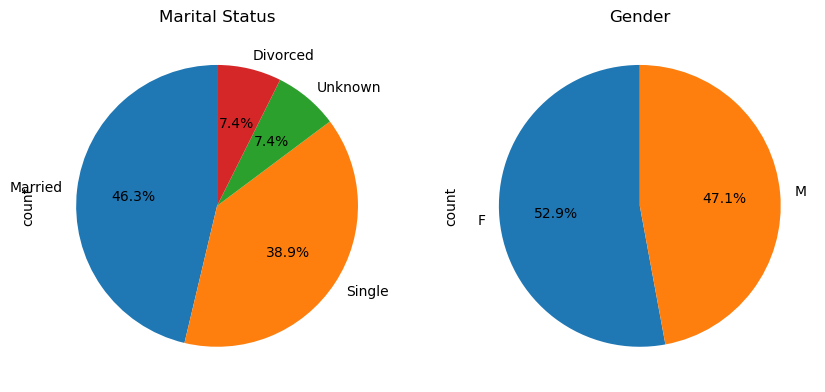

In [7]:
#pie charts
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, )
plt.title('Marital Status')

plt.subplot(1, 2, 2)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, )
plt.title('Gender')
plt.show()

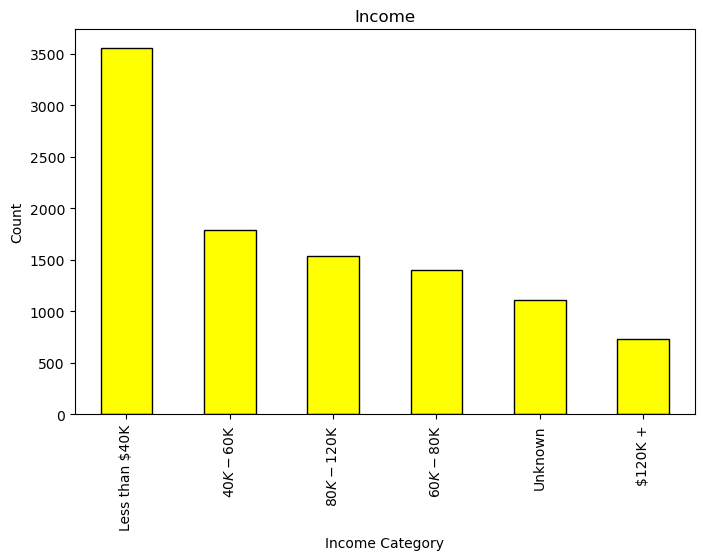

In [8]:
#income bar graph
income = df['Income_Category'].value_counts()

plt.figure(figsize=(8, 5))
income.plot(kind='bar', color=['yellow'], edgecolor='black')
plt.title('Income')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

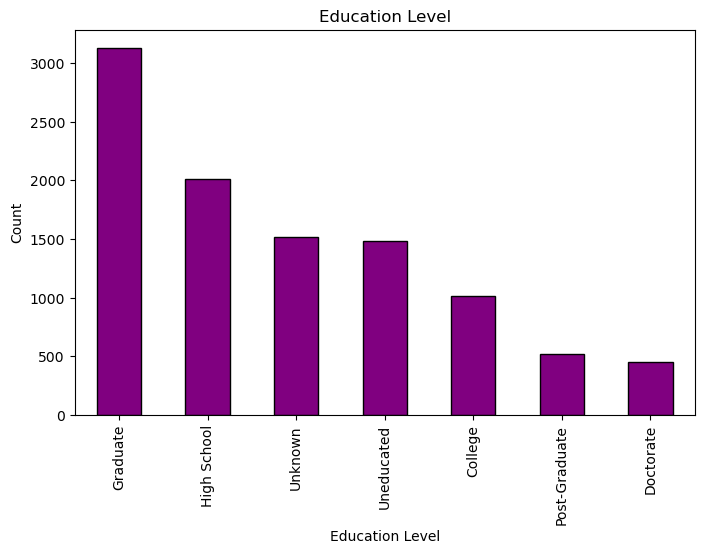

In [9]:
#education bar graph
ed = df['Education_Level'].value_counts()

plt.figure(figsize=(8, 5))
ed.plot(kind='bar', color=['purple'], edgecolor='black')
plt.title('Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

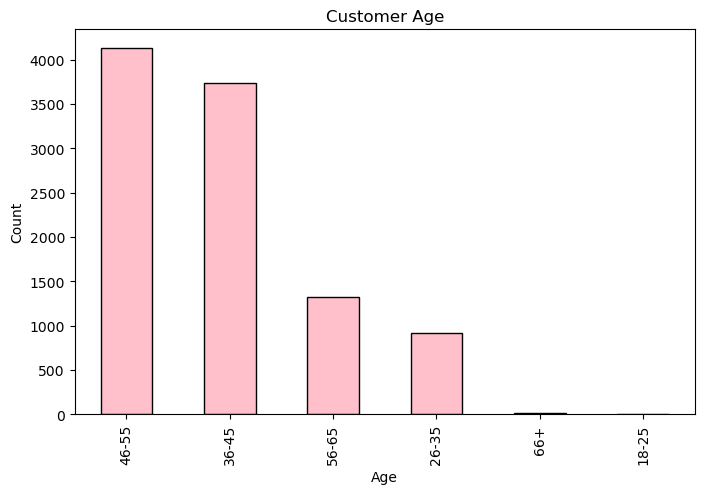

In [10]:
#age bar graph
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Category'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)
ed = df['Age_Category'].value_counts()
plt.figure(figsize=(8, 5))
ed.plot(kind='bar', color=['pink'], edgecolor='black')
plt.title('Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Analysis

In [11]:
from pandasql import sqldf

pysqldf = sqldf("SELECT * FROM df", globals())

In [12]:
query = sqldf("SELECT * FROM df WHERE Attrition_Flag == 'Attrited Customer'")
query.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Trans_Ct,Age_Category
0,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,3,1438.3,16,56-65
1,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,4,7882.0,16,66+
2,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,3,1438.3,19,46-55
3,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,3,15769.0,15,56-65
4,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,4,34516.0,15,46-55


As we can see here, many of the attrited customers have Blue credit cards lets look at how many credit card categories there are and how many customers are associated with each.

In [13]:
sqldf("SELECT Card_Category, COUNT(DISTINCT CLIENTNUM) FROM df WHERE Attrition_Flag == 'Attrited Customer' GROUP BY Card_Category")

,Card_Category,COUNT(DISTINCT CLIENTNUM)
0,Blue,1519
1,Gold,21
2,Platinum,5
3,Silver,82


In [14]:
sqldf("SELECT Card_Category, COUNT(DISTINCT CLIENTNUM) FROM df WHERE Attrition_Flag == 'Existing Customer' GROUP BY Card_Category")

,Card_Category,COUNT(DISTINCT CLIENTNUM)
0,Blue,7917
1,Gold,95
2,Platinum,15
3,Silver,473


The majority of attrited customers fall into the Blue card category. Even when compared to existing customers, blue dominates. In addition, the ratio between blue, gold, platinum, and silver cards in existing customers remains very similar to that of the attrited cutomers. Therefore, I will be focusing on attrited customers that hold blue cards.

In [15]:
attrited_df = sqldf("SELECT * FROM df WHERE Attrition_Flag == 'Attrited Customer' AND Card_Category == 'Blue'")
attrited_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Trans_Ct,Age_Category
0,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,3,1438.3,16,56-65
1,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,4,7882.0,16,66+
2,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,3,1438.3,19,46-55
3,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,3,15769.0,15,56-65
4,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,4,2158.0,12,46-55


In [16]:
existing_df = sqldf("SELECT * FROM df WHERE Attrition_Flag == 'Existing Customer' AND Card_Category == 'Blue'")
existing_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Trans_Ct,Age_Category
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,42,36-45
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,33,46-55
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,20,46-55
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,20,36-45
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,28,36-45


We now have three datasets in total: df (all customers), attrited_df (attrited blue card customers), and existing_df (existing blue card customers).

I will use these datasets to display and compare the correlations between each of our features (independent variables) to see if there is an notable difference between the two types of customers.

### Attrited vs Existing Customers - Gender

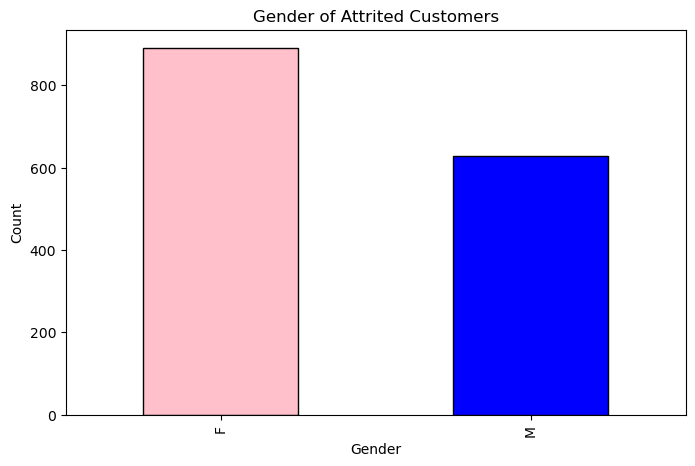

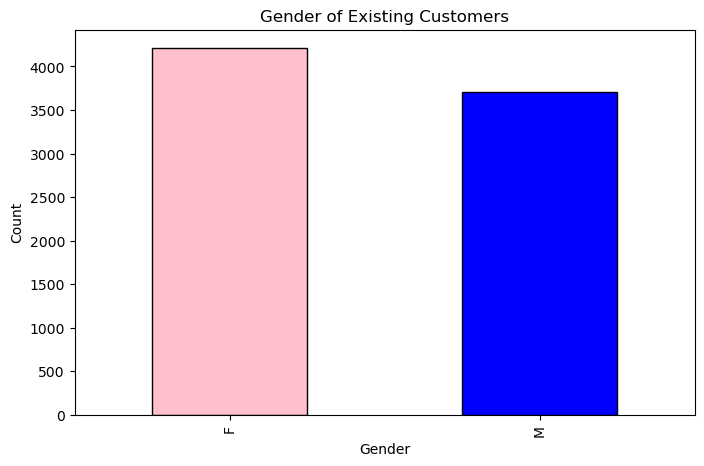

In [17]:
# Bar graph
gender1 = attrited_df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
gender1.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')
plt.title('Gender of Attrited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')

gender2 = existing_df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
gender2.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')
plt.title('Gender of Existing Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From these bar graphs we can infer that while the number of female existing customers remain proportional with those that are attritted, the number of men attriting is far less than existing male customers. This means men tend to be more loyal to this credit card company, which would be interesting to look into.

### Attrited vs Existing Customers - Age


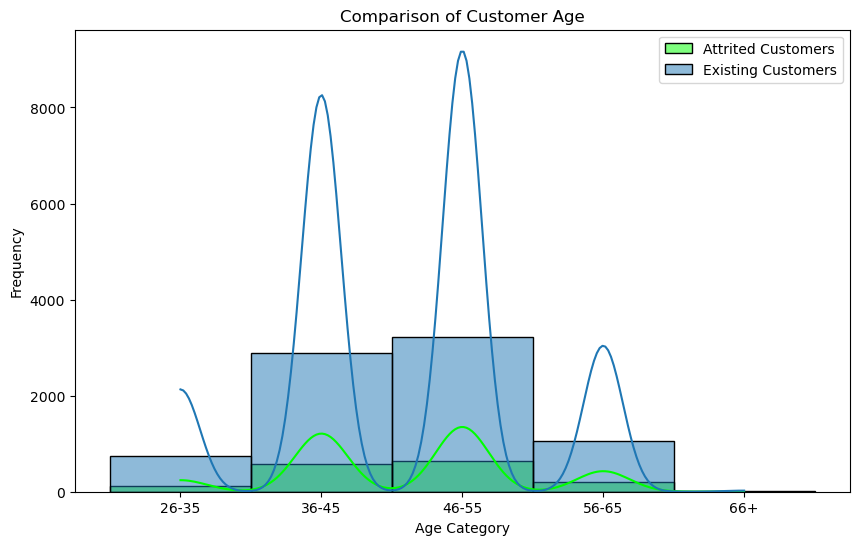

In [18]:
# bins to group the age data into categories
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

attrited_df['Age_Category'] = pd.cut(attrited_df['Customer_Age'], bins=bins, labels=labels)
existing_df['Age_Category'] = pd.cut(existing_df['Customer_Age'], bins=bins, labels=labels)

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(attrited_df, x='Age_Category', label='Attrited Customers', color='lime', kde=True)
sns.histplot(existing_df, x='Age_Category', label='Existing Customers', kde=True)
plt.title('Comparison of Customer Age')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [19]:
# basic stats to compare datasets
print("Attrited Customers:")
print(attrited_df.groupby('Age_Category')['Customer_Age'].describe())
print("\nExisting Customers:")
print(existing_df.groupby('Age_Category')['Customer_Age'].describe())

from scipy.stats import chi2_contingency
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Age_Category'], existing_df['Age_Category'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\n")
print(f"P-value: {p}")

Attrited Customers:
              count       mean       std   min   25%   50%   75%   max
Age_Category                                                          
18-25           0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN
26-35         113.0  31.991150  2.508897  26.0  30.0  32.0  34.0  35.0
36-45         569.0  41.355009  2.648507  36.0  39.0  42.0  44.0  45.0
46-55         634.0  50.091483  2.857515  46.0  48.0  50.0  53.0  55.0
56-65         201.0  58.915423  2.539254  56.0  57.0  59.0  61.0  65.0
66+             2.0  67.000000  1.414214  66.0  66.5  67.0  67.5  68.0

Existing Customers:
               count       mean       std   min   25%   50%   75%   max
Age_Category                                                           
18-25            0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN
26-35          745.0  31.781208  2.892179  26.0  30.0  33.0  34.0  35.0
36-45         2889.0  41.107996  2.806077  36.0  39.0  41.0  44.0  45.0
46-55         3212.0  50.037983

Though the number of customers differ greatly, the mean, standard deviation, and interquartile ranges remain fairly similar. This tells us that the distribution of attrited customers is proportionally consistent with the expected age of attrition within the dataset.

The p-value being high suggests that there is most likely not a correlation between age and attrition within these datasets. We can also see the the basic stats are almost identical, which further supports our findings. Additionally, I noticed that there are no customers under the age of 26 which is not a reason for attrition but could be an opportunity to try to get customers between the ages of 18-25.

### Attrited vs Existing Customers - Dependent Count


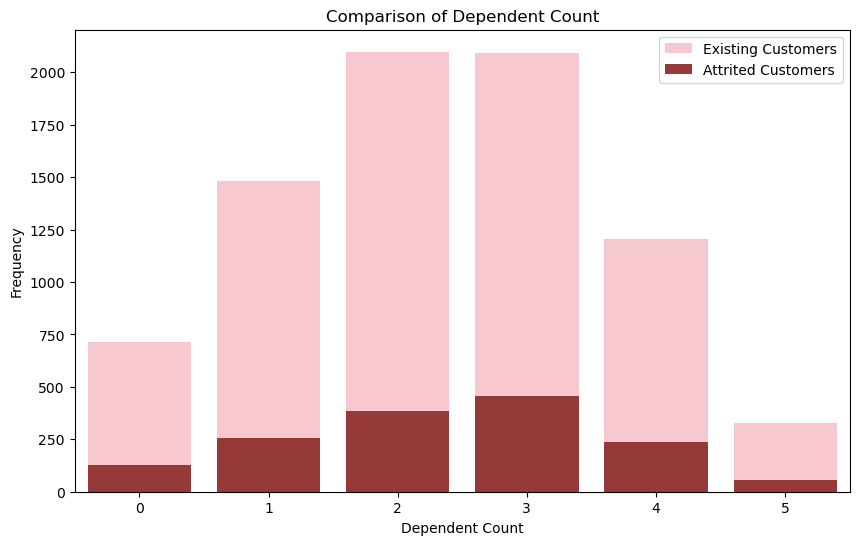

In [20]:
# Stacked bar graph
plt.figure(figsize=(10, 6))
sns.countplot(data=existing_df, x='Dependent_count', color='pink', label='Existing Customers')
sns.countplot(data=attrited_df, x='Dependent_count', color='brown', label='Attrited Customers')

plt.title('Comparison of Dependent Count')
plt.xlabel('Dependent Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Dependent_count'], existing_df['Dependent_count'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Dependent_count'].describe())
print("\nAttrited: ") 
print(attrited_df['Dependent_count'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count    7917.000000
mean        2.325502
std         1.299521
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Dependent_count, dtype: float64

Attrited: 
count    1519.000000
mean        2.393680
std         1.271606
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Dependent_count, dtype: float64


P-value: 0.6828995493684993


The bar graph and the stats of both independent variables indicate that the distribution of attrited customers aligns with that of existing customers. While there is a slight difference in proportionality for customers with three dependents, there is no consistent increase as the number of dependents rises. Therefore, no meaningful inferences can be drawn from this variation.

### Attrited vs Existing Customers - Education Level


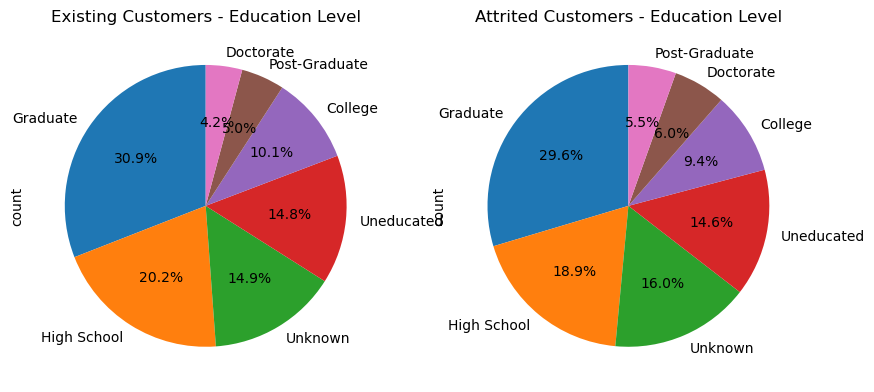

In [22]:
# Pie chart
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
existing_df['Education_Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Existing Customers - Education Level')

plt.subplot(1, 2, 2)
attrited_df['Education_Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Attrited Customers - Education Level')
plt.show()

In [23]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Education_Level'], existing_df['Education_Level'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Existing: ")
print(existing_df['Education_Level'].describe())
print("\nAttrited: ") 
print(attrited_df['Education_Level'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count         7917
unique           7
top       Graduate
freq          2449
Name: Education_Level, dtype: object

Attrited: 
count         1519
unique           7
top       Graduate
freq           450
Name: Education_Level, dtype: object


P-value: 0.7603101678981949


The p-value above suggests that there is no significant association between education level and the likelihood of being an attrited customer versus an existing customer. Let's move on to the next variable:

### Attrited vs Existing Customers - Marital Status

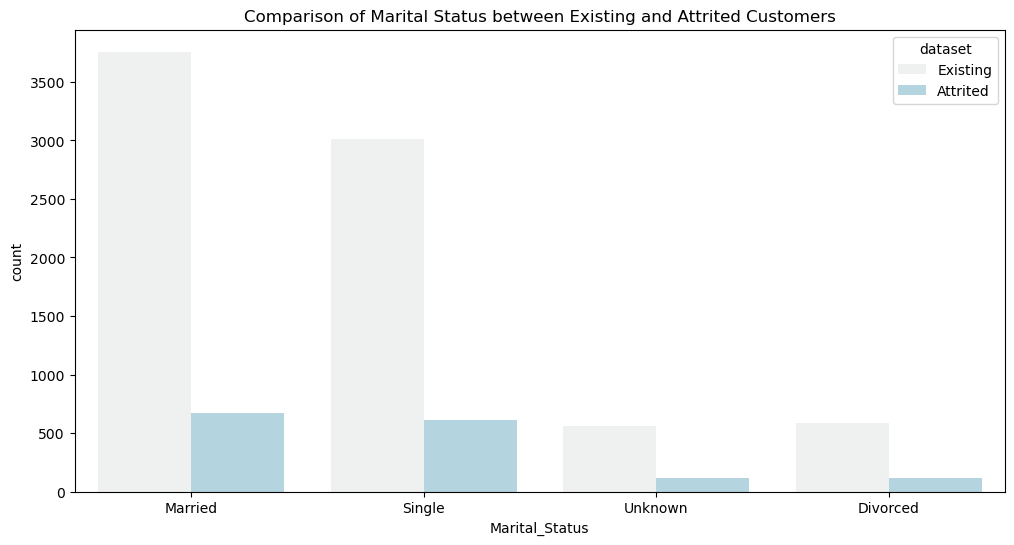

In [24]:
#Bar graph 
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital_Status', data=pd.concat([existing_df.assign(dataset='Existing'), attrited_df.assign(dataset='Attrited')]), hue='dataset', color = 'lightblue')
plt.title('Comparison of Marital Status between Existing and Attrited Customers')
plt.show()

Looking at the bar graph there seems to be similar amounts of married and single attrited customers, although there are more married existing cutomers than single existing customers.

In [25]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Marital_Status'], existing_df['Marital_Status'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Marital_Status'].describe())
print("\nAttrited: ") 
print(attrited_df['Marital_Status'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count        7917
unique          4
top       Married
freq         3759
Name: Marital_Status, dtype: object

Attrited: 
count        1519
unique          4
top       Married
freq          674
Name: Marital_Status, dtype: object


P-value: 0.9358614940306096


The p-value suggests that the distribution is not statistically significant. We cannot consider marital status a potential contributor to customer attrition.

### Attrited vs Existing Customers - Income Category

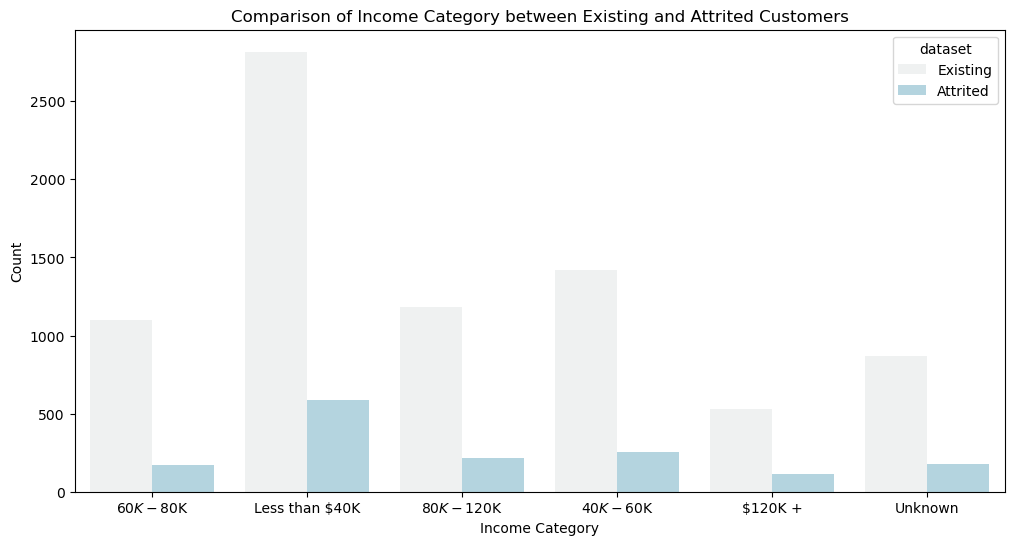

In [26]:
# Bar graph
plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Category', data=pd.concat([existing_df.assign(dataset='Existing'), attrited_df.assign(dataset='Attrited')]), hue='dataset', color = 'lightblue')
plt.title('Comparison of Income Category between Existing and Attrited Customers')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

In [27]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Income_Category'], existing_df['Income_Category'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Income_Category'].describe())
print("\nAttrited: ") 
print(attrited_df['Income_Category'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count               7917
unique                 6
top       Less than $40K
freq                2817
Name: Income_Category, dtype: object

Attrited: 
count               1519
unique                 6
top       Less than $40K
freq                 586
Name: Income_Category, dtype: object


P-value: 0.1595770127932435


The p-value is statistically insignficant but it is much lower than previous p-value's we have seen. The majority of attrited customers make less than $40K.

### Attrited vs Existing Customers - Months on Book

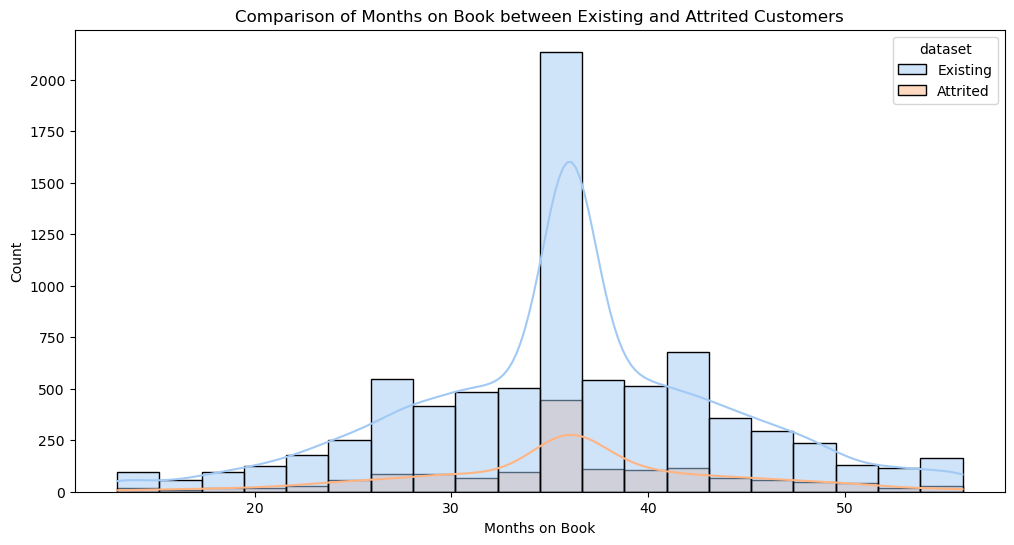

In [28]:
# Histogram
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Comparison of Months on Book between Existing and Attrited Customers')

sns.histplot(data=pd.concat([existing_df.assign(dataset='Existing'), attrited_df.assign(dataset='Attrited')]),
             x='Months_on_book', hue='dataset', kde=True, bins=20, common_norm=False, palette='pastel')
ax.set_xlabel('Months on Book')
ax.set_ylabel('Count')
plt.show()

In [29]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Months_on_book'], existing_df['Months_on_book'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Months_on_book'].describe())
print("\nAttrited: ") 
print(attrited_df['Months_on_book'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count    7917.000000
mean       35.914740
std         8.070444
min        13.000000
25%        31.000000
50%        36.000000
75%        40.000000
max        56.000000
Name: Months_on_book, dtype: float64

Attrited: 
count    1519.000000
mean       36.200132
std         7.829590
min        13.000000
25%        32.000000
50%        36.000000
75%        40.000000
max        56.000000
Name: Months_on_book, dtype: float64


P-value: 0.46259064074880635


The bars in both groups of this histogram appear to be proportional to each other and consistent with the overall distribution. In addition, the p-value is statistically insignificant and stats are very similar to one another. In this case, months on book does not seem to direclty affect customer attrition.

### Attrited vs Existing Customers - Months Inactive 

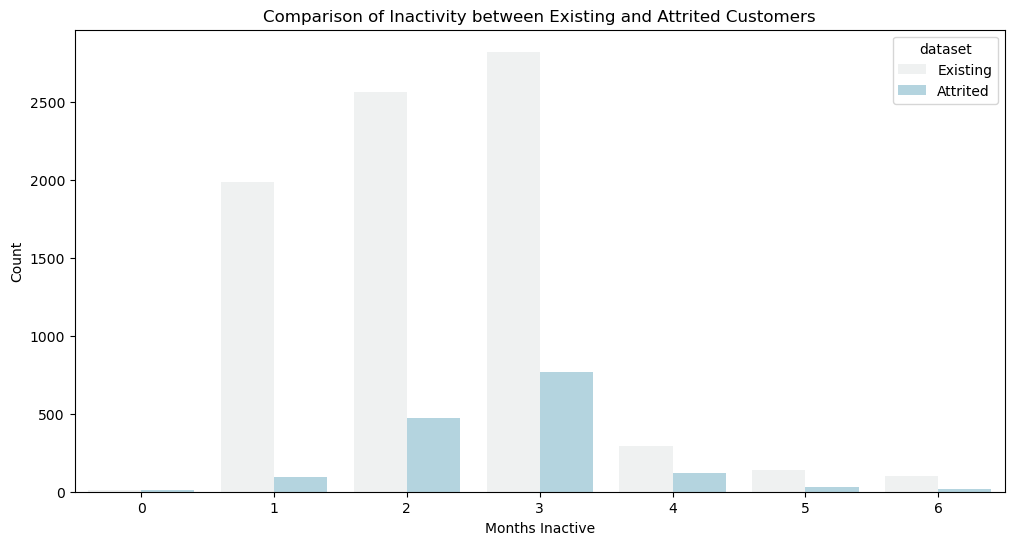

In [30]:
# Bar graph
plt.figure(figsize=(12, 6))
sns.countplot(x='Months_Inactive_12_mon', data=pd.concat([existing_df.assign(dataset='Existing'), attrited_df.assign(dataset='Attrited')]), hue='dataset', color = 'lightblue')
plt.title('Comparison of Inactivity between Existing and Attrited Customers')
plt.xlabel('Months Inactive')
plt.ylabel('Count')
plt.show()

In [31]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Months_Inactive_12_mon'], existing_df['Months_Inactive_12_mon'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Months_Inactive_12_mon'].describe())
print("\nAttrited: ") 
print(attrited_df['Months_Inactive_12_mon'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count    7917.000000
mean        2.278262
std         1.021373
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Months_Inactive_12_mon, dtype: float64

Attrited: 
count    1519.000000
mean        2.697169
std         0.903331
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: Months_Inactive_12_mon, dtype: float64


P-value: 0.7594804006610248


Though the p-value is once again statistically insignficant, it seems that the majority of attrited customers are usually inactive for 1-3 months before they leave.



### Attrited vs Existing Customers - Credit Limit

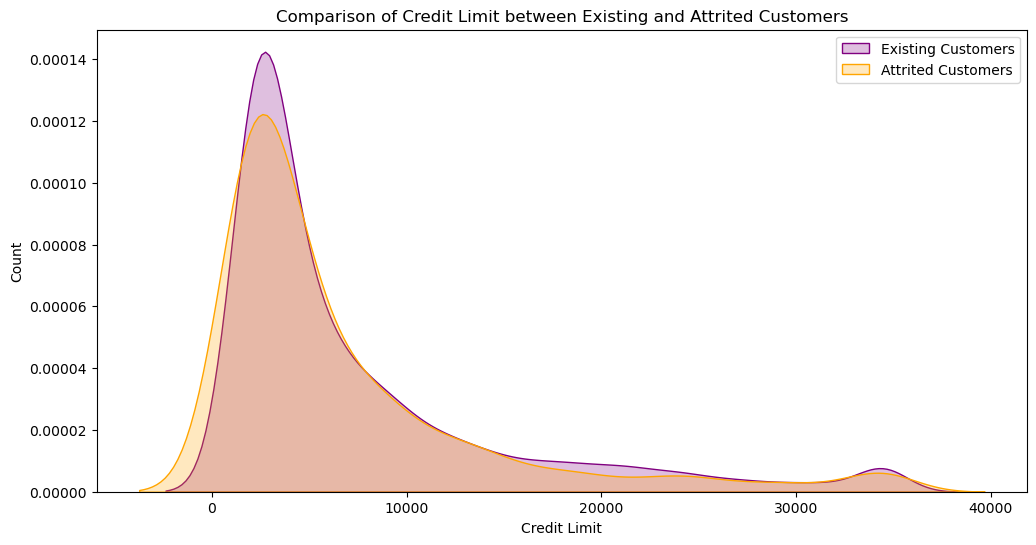

In [32]:
# KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(existing_df['Credit_Limit'], label='Existing Customers', color='purple', fill=True)
sns.kdeplot(attrited_df['Credit_Limit'], label='Attrited Customers', color='orange', fill=True)
plt.title('Comparison of Credit Limit between Existing and Attrited Customers')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.legend()
plt.show()

In [34]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Credit_Limit'], existing_df['Credit_Limit'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Credit_Limit'].describe())
print("\nAttrited: ") 
print(attrited_df['Credit_Limit'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count     7917.000000
mean      7468.544891
std       7673.215626
min       1438.300000
25%       2535.000000
50%       4163.000000
75%       9227.000000
max      34516.000000
Name: Credit_Limit, dtype: float64

Attrited: 
count     1519.000000
mean      6817.747334
std       7470.187714
min       1438.300000
25%       2004.500000
50%       3841.000000
75%       8313.500000
max      34516.000000
Name: Credit_Limit, dtype: float64


P-value: 3.2169050842363958e-06


The credit limit of the attrited customers seems to follow a similar path as that of the existing customers. We cannot say that credit limit could contribute to attrition.

### Attrited vs Existing Customers - Total Transaction Count

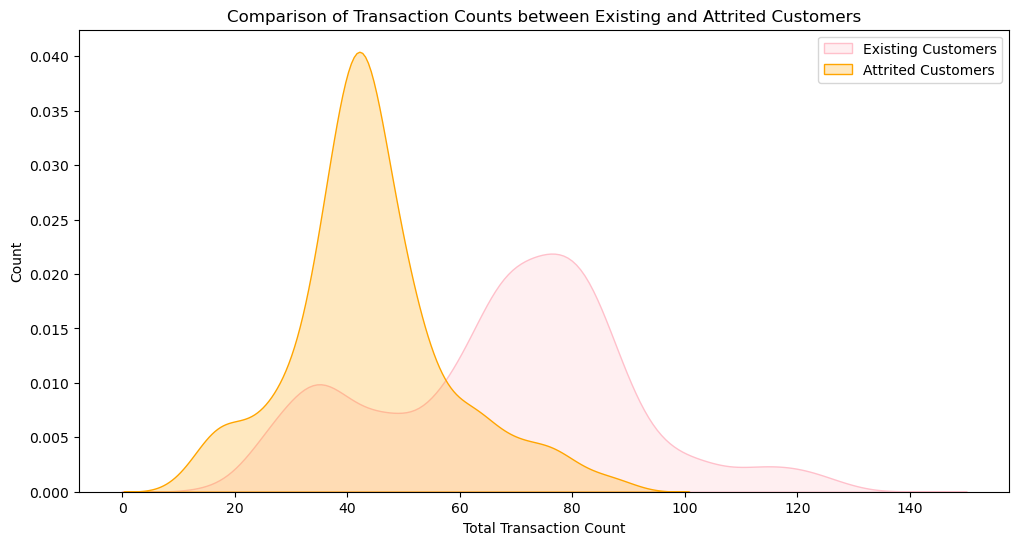

In [35]:
# KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(existing_df['Total_Trans_Ct'], label='Existing Customers', color='pink', fill=True)
sns.kdeplot(attrited_df['Total_Trans_Ct'], label='Attrited Customers', color='orange', fill=True)
plt.title('Comparison of Transaction Counts between Existing and Attrited Customers')
plt.xlabel('Total Transaction Count')
plt.ylabel('Count')
plt.legend()
plt.show()

In [36]:
# chi contingency table formula to calculate p-value
contingency_table = pd.crosstab(attrited_df['Total_Trans_Ct'], existing_df['Total_Trans_Ct'])
chi2, p, _, _ = chi2_contingency(contingency_table)
# basic stats
print("Existing: ")
print(existing_df['Total_Trans_Ct'].describe())
print("\nAttrited: ") 
print(attrited_df['Total_Trans_Ct'].describe())
print("\n")
#print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Existing: 
count    7917.000000
mean       67.827460
std        22.365623
min        11.000000
25%        53.000000
50%        70.000000
75%        82.000000
max       139.000000
Name: Total_Trans_Ct, dtype: float64

Attrited: 
count    1519.000000
mean       44.226465
std        14.138318
min        10.000000
25%        37.000000
50%        43.000000
75%        50.500000
max        91.000000
Name: Total_Trans_Ct, dtype: float64


P-value: 9.19742621902323e-39


As expected, the number transactions of attrited customers is significantly less than existing customers, this could be because they had the card for less time than current customers (given they left) or because they just did not use the card very much (which could be a big reason for customer attrition).

Let's see if the credit limit's of these attrited customers have an impact on their overall number of transactions:

### Attrited vs Existing Customers - Credit Limit & Transaction Count

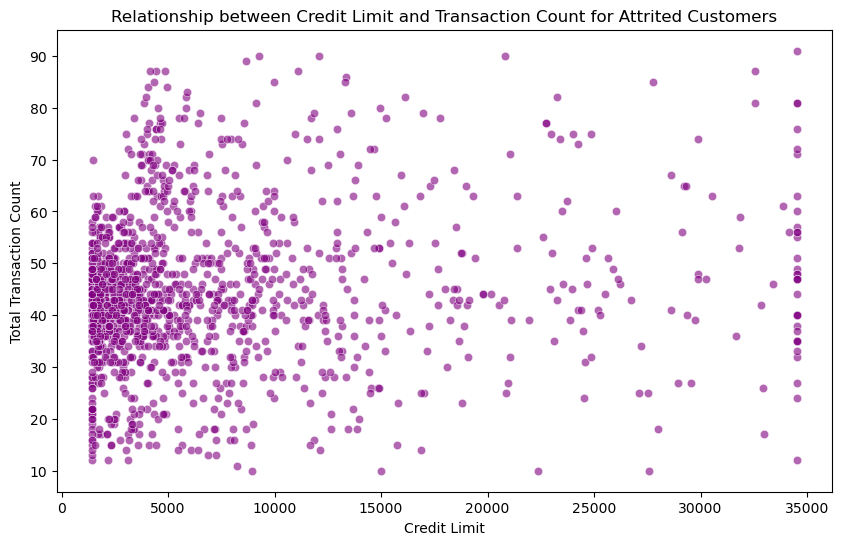

In [37]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit_Limit', y='Total_Trans_Ct', data=attrited_df, color='purple', alpha=0.6)
plt.title('Relationship between Credit Limit and Transaction Count for Attrited Customers')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Count')
plt.show()

The vast majority of these customers credit limits are under 10,000 (mainly under 5,000).

In [38]:
X = sm.add_constant(attrited_df['Credit_Limit'])
y = attrited_df['Total_Trans_Ct']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_Trans_Ct   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     28.67
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           9.90e-08
Time:                        22:38:05   Log-Likelihood:                -6164.3
No. Observations:                1519   AIC:                         1.233e+04
Df Residuals:                    1517   BIC:                         1.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.4691      0.487     87.244   

This model shows us a statistically significant but weak relationship between credit limit and total transaction count for attrited customers. It suggests that approximately 1.9% of the variability in the dependent variable total transaction count is explained by the credit limit. Therefore it is possible that lower credit limits are linked with lower transaction counts and could contribute to customer attrition.

I would also like to conduct a linear regression analysis on customer age and transaction counts to see if there is a trend there:

### Attrited vs Existing Customers - Age & Transaction Count

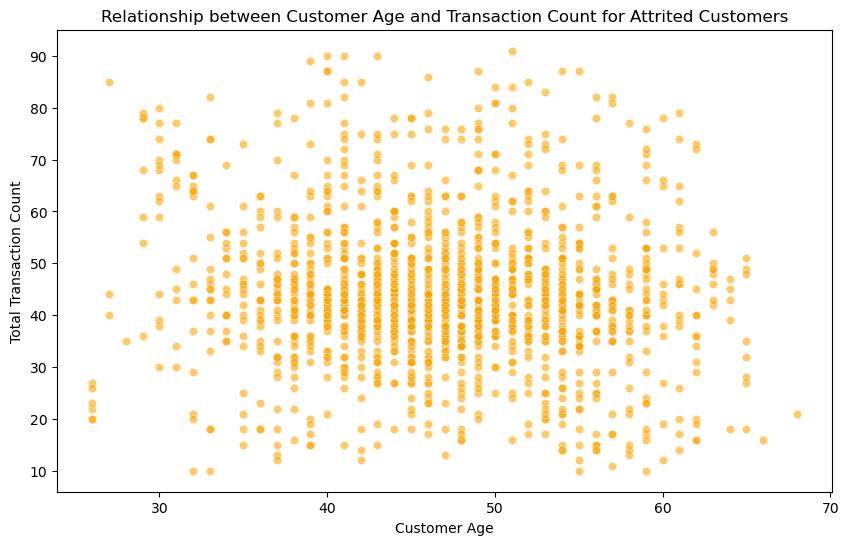

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Total_Trans_Ct', data=attrited_df, color='orange', alpha=0.6)
plt.title('Relationship between Customer Age and Transaction Count for Attrited Customers')
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Count')
plt.show()

In [40]:
X = sm.add_constant(attrited_df['Customer_Age'])
y = attrited_df['Total_Trans_Ct']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_Trans_Ct   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     15.47
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           8.76e-05
Time:                        22:38:11   Log-Likelihood:                -6170.8
No. Observations:                1519   AIC:                         1.235e+04
Df Residuals:                    1517   BIC:                         1.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.8368      2.219     23.814   

The R-squared tells us that in this model approximately 1% of the variability in total transaction count is explained by customer age even though it is considered statistically significant because of the P-value.

### Most attrited demographic

In [41]:
import plotly.express as px

This query outputs the factors that I have found either to be relevant to customer attrition or just an important factor to consider even if it does not contribute to attrition.

In [58]:
result = sqldf("SELECT COUNT(CLIENTNUM) AS COUNT, Gender, Income_Category, Marital_Status, Customer_Age, Total_Trans_Ct, Credit_Limit FROM attrited_df GROUP BY Gender, Income_Category, Marital_Status, Education_Level, Customer_Age, Total_Trans_Ct, Credit_Limit")
result.head()

,COUNT,Gender,Income_Category,Marital_Status,Customer_Age,Total_Trans_Ct,Credit_Limit
0,1,F,$40K - $60K,Divorced,45,50,3076.0
1,1,F,$40K - $60K,Divorced,55,44,4410.0
2,1,F,$40K - $60K,Divorced,48,38,3646.0
3,1,F,$40K - $60K,Divorced,41,28,10360.0
4,1,F,$40K - $60K,Divorced,45,43,1477.0


Let's make a treamap of this data and see what most of our attrited customers look like:

In [62]:
# Treemap
fig = px.treemap(
    result,
    path=['Gender', 'Income_Category', 'Marital_Status'],
    values='COUNT',
    color='Customer_Age', 
    hover_data=['Total_Trans_Ct', 'Credit_Limit'],
    title='Treemap of Attrited Customers',
    color_continuous_scale='Viridis',  
    template='plotly_dark',
)
fig.show()

From this treemap, we can see that there are more women attrited (which we identified earlier) and the majority of them are single or married, make less than 40k, and are in their mid-40s. On the other hand, the attried men's results are scattered across various incomes and marital statuses other than having age in common with the women's results.

I would like to use a different query to get more specific results. On the query below, I have added restrictions such as credit limit under 15,000 and marital status 'single' or 'married' based off of correlations I have found between the variables I analyzed.

Let's use this query to make a heatmap and find out who the majority of our attrited customers are in this criterea:

In [44]:
result2 = sqldf("SELECT COUNT(CLIENTNUM) AS COUNT, Gender, Income_Category, Marital_Status, Education_Level, Customer_Age, Total_Trans_Ct, Credit_Limit FROM attrited_df WHERE Income_Category LIKE 'Less than%' AND Credit_Limit <= 15000 AND Total_Trans_Ct <= 70 AND (Dependent_count BETWEEN 1 AND 4) AND Marital_Status = 'Single' OR 'Married' GROUP BY Gender, Income_Category, Marital_Status, Education_Level, Customer_Age, Total_Trans_Ct, Credit_Limit")
result2.head()

,COUNT,Gender,Income_Category,Marital_Status,Education_Level,Customer_Age,Total_Trans_Ct,Credit_Limit
0,1,F,Less than $40K,Single,College,35,42,2231.0
1,1,F,Less than $40K,Single,College,35,45,3611.0
2,1,F,Less than $40K,Single,College,38,50,3119.0
3,1,F,Less than $40K,Single,College,40,60,5989.0
4,1,F,Less than $40K,Single,College,42,36,3802.0


In [63]:
# Treemap
fig = px.treemap(
    result2,
    path=['Gender', 'Income_Category', 'Marital_Status', 'Education_Level'],
    values='COUNT',
    color='Customer_Age', 
    hover_data=['Total_Trans_Ct', 'Credit_Limit'],
    title='Treemap of Attrited Customers',
    color_continuous_scale='Viridis', 
    template='plotly_dark',
)
fig.show()

The majority of attrited customers seem to be single women in their mid to late 40s who make under 40k.

# Insights

**Inactivity**
- Customers who have between inactive between 1-3 months have the highest rates of attrition.

    Suggestion:
    - Notifying customers who have been inactive for atleast 30 days of their inactivity and offering special promotions for resuming activity.
    - Collect feedback through customer experience surveys every 6 months from customers who have been inactive for 1-3 months. 

**Credit Limit**
- Attrited customers tended to use their cards less when their credit limit was under 5,000.

    Suggestion:
    - A credit limit increase program (for all customers) that rewards customers based off of responsible & increased card usage.
    - Offering resources to help customers build healthy credit card habits.

**Transaction Count**
- Attrited customers used their cards a lot less than existing customers, which could be one of the main reasons for attriton.

    Suggestion:
    - Collect feedback through customer experience surveys every 6 months from customers who have less than 70 total transactions.
    - Personalizing promotions by segmenting customers and targeting each segment individually (one of those segments being customers with credit card limits under 5k and the other being customers with total transactions under 70).
    
**Age**
- People tend to get their first credit cards between 18-21 years old but there are no customers under 26 at this credit card company.

    Suggestion:
    - Make new student credit cards or make current credit cards student-friendly by offering promotions/deals such as first few months with 0% APR and flexible payment plans.
    - Utilize social media and influencers on instagram and tik tok to advertise credit cards to a younger audience.

# Conclusion

The credit card company can improve customer satisfaction, reduce loss of customers, and offer better services by following the insights above. Regularly analyzing customer behavior and feedback to continue enhancing their services will help them retain customers in the long run.